# Data Analyst Program - Interim Project 

<hr/>

### The AdventureWorks demo database serves as a great platform to practice SQL and data analytics skills. In this project, We are working as a team to answer a set of questions using the AdventureWorks dataset, a demo dataset maintained by Microsoft.

## Project Instructions and Deliverables

1.	What are the regional sales in the best performing country?

2.	What is the relationship between annual leave taken and bonus?

3.	What is the relationship between Country and Revenue?

4.	What is the relationship between sick leave and Job Title?

5.	What is the relationship between store trading duration and revenue?

6.	What is the relationship between the size of the stores, number of employees and revenue?

### Question 1 - What are the regional sales in the best performing country?
<hr/>
<p>To tackel this question, I followed these steps:<br>

* On SSMS I created a view and selected the following columns: 

    1. From the **SalesTerritory**('st') table, I selected <em>TerritoryID</em> that is the primary key on this table, <em>CountryRegionCode</em> and the <em>Region</em> name<br>
    2. From the **CountryRegion()**('pr') table, I selected the <em>name</em> column, that is the country name
    3. From **SalesOrderHeader**('sh') table, I selected the <em>Sub Total</em> column and aliased as <em>TotalSales</em> 
<br><br>

* Left joined **SalesOrderHeader**(sh) table with the SalesTerritory(st) table using the <em>TerritoryID</em> FK
* Left Joined the **CountryRegion**(pr) table and the SalesTerritory table on CountryRegionCode PK<br>
* On the where clause, I specified that <em>OrderDate</em> from the **SalesOrderHeader** should be for the **2013** year
* In order to find the best performing country, I used the pandas iloc function to select the first row and 
<em>CountryCode</em> column and stored the result on <em>k_region</em> variable
* Then I subset the dataframe column <em>CountryCode</em> with <em>k_region</em> variable to filter only the regions that belongs to the most performing country 

<p> To start off the project, we are setting up a connection to my SQL Server instance and database. Here this is a Trusted Connection and does not require login details</p>

In [3]:
# Importing the required libaries
import pyodbc
import pandas as pd
from matplotlib import pyplot as plt

conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=DESKTOP-J5R1BFO;'
                      'Database=AdventureWorks2019;'
                      'Trusted_Connection=yes;')

<p>Now that I have a connection, we are using the read_sql_query method to create a dataframe from the server connection. 
</p>

In [8]:
# this will read the queries and create a new dataframe object 
# as I was not able to use the Order By clause within the Sql view, I ordered the TotalSales column within Pandas
df = pd.read_sql_query('SELECT * FROM SalesRegionV ORDER BY TotalSales DESC', conn)

# print the head of the dataframe object
print(df)

  CountryCode     CountryName          Region  TotalSales
0          US   United States       Southwest     9116540
1          CA          Canada          Canada     6229518
2          US   United States       Northwest     6015175
3          AU       Australia       Australia     4230664
4          FR          France          France     3806506
5          GB  United Kingdom  United Kingdom     3633423
6          US   United States         Central     2994225
7          US   United States       Northeast     2631260
8          DE         Germany         Germany     2565221
9          US   United States       Southeast     2399947


C:\Users\cmdas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


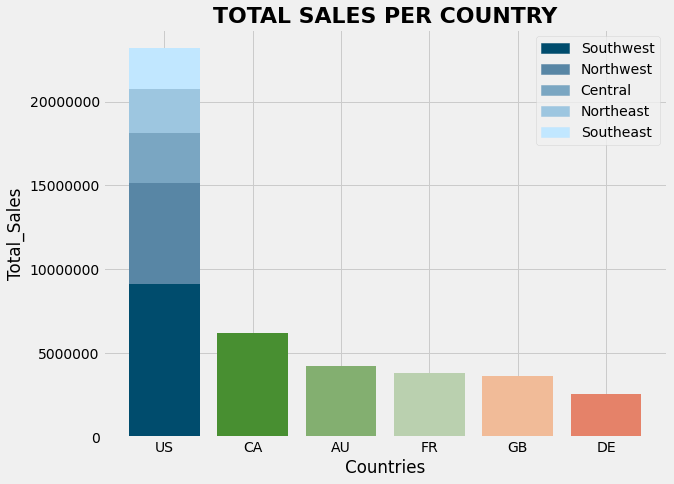

In [9]:
import numpy as np
# select US on CountryCode column and TotalSales in US
us_x = df.iloc[0, 0]
us_bool = df['CountryCode'] == us_x
df_us = df[us_bool]
us_total = np.array(df_us['TotalSales'])
us_regions = np.array(df_us['Region'])

# select CA on CountryCode column and TotalSales in CA
ca_x = df.iloc[1, 0]
ca_bool = df['CountryCode'] == ca_x
df_ca = df[ca_bool]
ca_total = df_ca['TotalSales']

# select AU on CountryCode column and TotalSales in AU
au_x = df.iloc[3, 0]
au_bool = df['CountryCode'] == au_x
df_au = df[au_bool]
au_total = df_au['TotalSales']

# select FR on CountryCode column and TotalSales in FR
fr_x = df.iloc[4, 0]
fr_bool = df['CountryCode'] == fr_x
df_fr = df[fr_bool]
fr_total = np.array(df_fr['TotalSales'])

# select GB on CountryCode column and TotalSales in GB
gb_x = df.iloc[5, 0]
gb_bool = df['CountryCode'] == gb_x
df_gb = df[gb_bool]
gb_total = df_gb['TotalSales']

# select DE on CountryCode column and TotalSales in DE
de_x = df.iloc[8, 0]
de_bool = df['CountryCode'] == de_x
df_de = df[de_bool]
de_total = df_de['TotalSales']

# create the plot
import matplotlib.pyplot as plt
plt.ticklabel_format(style='plain') 
plt.style.use('fivethirtyeight')
# plot bars in stack manner US 
plt.bar(us_x, us_total[0], color='#004c6d')
plt.bar(us_x, us_total[1], bottom=us_total[0], color='#5886a5')
plt.bar(us_x, us_total[2], bottom=us_total[0] + us_total[1], color='#7aa6c2')
plt.bar(us_x, us_total[3], bottom=us_total[0] + us_total[1] + us_total[2] , color='#9dc6e0')
plt.bar(us_x, us_total[4], bottom=us_total[0] + us_total[1] + us_total[2] + us_total[3], color='#c1e7ff')
#adding legend to US regions
colors = {'Southwest':'#004c6d', 'Northwest':'#5886a5', 'Central':'#7aa6c2', 'Northeast':'#9dc6e0', 'Southeast': '#c1e7ff'} 
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
 
# plot bars in CA
plt.bar(ca_x, ca_total, color='#488f31')

# plot bars in AU
plt.bar(au_x, au_total, color='#83af70')

# plot bars in FR
plt.bar(fr_x, fr_total, color='#bad0af')

# plot bars in GB
plt.bar(gb_x, gb_total, color='#f1bb98')

# plot bars in DE
plt.bar(de_x, de_total, color='#e58269')
 
plt.xlabel("Countries")
plt.ylabel("Total_Sales")
plt.title("TOTAL SALES PER COUNTRY", fontsize=22, fontweight='bold')
plt.show()

 <p> As the table was ordered in descending order, the country with the best sales performance went to the top row, that is the <strong>United States</strong>.<br>
Then I used slicing with the iloc function to select the indice of the first row and column of the dataframe which is the <em>CountryCode</em>.<br>
<p>With the best performing country stored in the variable <em>K_region</em>, I used the slicing again to subset the <em>CountryCode</em> column with the <em>K_region</em> boolean values and stored the result in the <strong>USregions</strong> variable.<br>
<p>Then I created a dataframe <strong>df_r</strong> with all the regions that contain <strong>US</strong> as country code.</pr>


In [10]:
# select the first row on CountryCode column 
k_region = df.iloc[0, 0]
# subset the dataframe with the boolean result in k_region
USregions = df['CountryCode'] ==k_region
df_r = df[USregions]
print(df_r)


  CountryCode    CountryName     Region  TotalSales
0          US  United States  Southwest     9116540
2          US  United States  Northwest     6015175
6          US  United States    Central     2994225
7          US  United States  Northeast     2631260
9          US  United States  Southeast     2399947


<p>Then I created the the variables <em>regional</em> and <em>total</em> to extract the values fron the <em>df_r</em> dataframe to use on the bar plot</p>

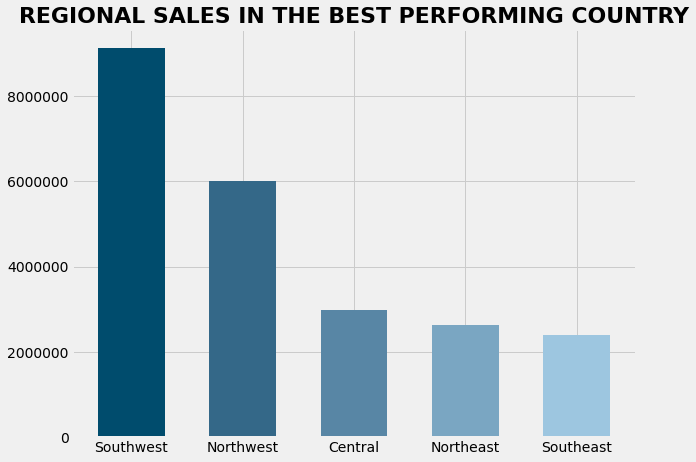

In [11]:
# create the variable region for the Region values
us_region = df_r.iloc[:, 2]
# Create the variable total for the TotalSales values
total = df_r.iloc[:, 3]

# create the plot
import matplotlib.pyplot as plt
plt.ticklabel_format(style='plain')
# mixing two styles
plt.style.use('fivethirtyeight')
plt.bar(us_region, total, width=0.6, color=['#004c6d', '#346888', '#5886a5', '#7aa6c2', '#9dc6e0'])
plt.title("REGIONAL SALES IN THE BEST PERFORMING COUNTRY", fontsize= 22, fontweight='bold')
plt.rcParams["figure.figsize"] = (9,7)
plt.show()